# Mobile Phone Price Range Prediction

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [199]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.drop('id',axis=1)
sample = pd.read_csv('sample.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Lets just try three simple algorithm on the raw dataset
- Logistic regression 
- Decision Trees
- Random Forest

In [82]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('price_range',axis=1), train['price_range'], test_size=0.33, random_state=42)
clf = LogisticRegression(random_state=0, multi_class='ovr')
model = clf.fit(X_train, y_train)
prediction=model.predict(X_test)
print('ACCURACY:',metrics.accuracy_score(prediction,y_test))
print("F1 SCORE:",metrics.f1_score(y_test, prediction, average='weighted'))

ACCURACY: 0.7924242424242425
F1 SCORE: 0.7860309795377115


In [112]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
prediction=decisiontree.predict(X_test)
print('ACCURACY:',metrics.accuracy_score(prediction,y_test))
print("F1 SCORE:",metrics.f1_score(y_test, prediction, average='weighted'))

ACCURACY: 0.8090909090909091
F1 SCORE: 0.8101318098242132


In [113]:
randomforest=RandomForestClassifier(n_estimators =100)
randomforest.fit(X_train, y_train)
prediction=randomforest.predict(X_test)
print('ACCURACY:',metrics.accuracy_score(prediction,y_test))
print("F1 SCORE:",metrics.f1_score(y_test, prediction, average='weighted'))

ACCURACY: 0.8742424242424243
F1 SCORE: 0.8744771226136763


In [93]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.26515151515151514
Accuracy for SVM kernel= linear is 0.9757575757575757


### Lets try Xgboost 

In [114]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(train.drop('price_range',axis=1), train['price_range'], test_size=0.33, random_state=42)
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 1000
bst = xgb.train(param, xg_train, num_round, watchlist)
# get prediction
pred = bst.predict(xg_test)
print('ACCURACY:',metrics.accuracy_score(pred,y_test))
print("F1 SCORE:",metrics.f1_score(y_test, pred, average='weighted'))

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0]	train-merror:0.051493	test-merror:0.151515
[1]	train-merror:0.049254	test-merror:0.14697
[2]	train-merror:0.047761	test-merror:0.145455
[3]	train-merror:0.041791	test-merror:0.145455
[4]	train-merror:0.041045	test-merror:0.148485
[5]	train-merror:0.038806	test-merror:0.140909
[6]	train-merror:0.035821	test-merror:0.142424
[7]	train-merror:0.037313	test-merror:0.139394
[8]	train-merror:0.032836	test-merror:0.136364
[9]	train-merror:0.029104	test-merror:0.134848
[10]	train-merror:0.026119	test-merror:0.134848
[11]	train-merror:0.026119	test-merror:0.136364
[12]	train-merror:0.025373	test-merror:0.140909
[13]	train-merror:0.024627	test-merror:0.142424
[14]	train-merror:0.021642	test-merror:0.137879
[15]	train-merror:0.020149	test-merror:0.134848
[16]	train-merror:0.018657	test-merror:0.128788
[17]	train-merror:0.018657	test-merror:0.130303
[18]	train-merror:0.018657	test-merror:0.131818
[19]	train-merror:0.014925	test-merror:0.122727
[20]	train-merror:0.014179	test-merror:0.124242
[21

[190]	train-merror:0	test-merror:0.1
[191]	train-merror:0	test-merror:0.098485
[192]	train-merror:0	test-merror:0.098485
[193]	train-merror:0	test-merror:0.09697
[194]	train-merror:0	test-merror:0.09697
[195]	train-merror:0	test-merror:0.098485
[196]	train-merror:0	test-merror:0.098485
[197]	train-merror:0	test-merror:0.09697
[198]	train-merror:0	test-merror:0.098485
[199]	train-merror:0	test-merror:0.098485
[200]	train-merror:0	test-merror:0.09697
[201]	train-merror:0	test-merror:0.09697
[202]	train-merror:0	test-merror:0.09697
[203]	train-merror:0	test-merror:0.09697
[204]	train-merror:0	test-merror:0.095455
[205]	train-merror:0	test-merror:0.09697
[206]	train-merror:0	test-merror:0.095455
[207]	train-merror:0	test-merror:0.09697
[208]	train-merror:0	test-merror:0.09697
[209]	train-merror:0	test-merror:0.09697
[210]	train-merror:0	test-merror:0.09697
[211]	train-merror:0	test-merror:0.095455
[212]	train-merror:0	test-merror:0.09697
[213]	train-merror:0	test-merror:0.09697
[214]	train

[386]	train-merror:0	test-merror:0.090909
[387]	train-merror:0	test-merror:0.090909
[388]	train-merror:0	test-merror:0.089394
[389]	train-merror:0	test-merror:0.090909
[390]	train-merror:0	test-merror:0.090909
[391]	train-merror:0	test-merror:0.089394
[392]	train-merror:0	test-merror:0.089394
[393]	train-merror:0	test-merror:0.089394
[394]	train-merror:0	test-merror:0.090909
[395]	train-merror:0	test-merror:0.090909
[396]	train-merror:0	test-merror:0.090909
[397]	train-merror:0	test-merror:0.090909
[398]	train-merror:0	test-merror:0.090909
[399]	train-merror:0	test-merror:0.090909
[400]	train-merror:0	test-merror:0.090909
[401]	train-merror:0	test-merror:0.090909
[402]	train-merror:0	test-merror:0.090909
[403]	train-merror:0	test-merror:0.089394
[404]	train-merror:0	test-merror:0.089394
[405]	train-merror:0	test-merror:0.089394
[406]	train-merror:0	test-merror:0.089394
[407]	train-merror:0	test-merror:0.089394
[408]	train-merror:0	test-merror:0.089394
[409]	train-merror:0	test-merror:0

[582]	train-merror:0	test-merror:0.086364
[583]	train-merror:0	test-merror:0.086364
[584]	train-merror:0	test-merror:0.086364
[585]	train-merror:0	test-merror:0.086364
[586]	train-merror:0	test-merror:0.086364
[587]	train-merror:0	test-merror:0.086364
[588]	train-merror:0	test-merror:0.086364
[589]	train-merror:0	test-merror:0.086364
[590]	train-merror:0	test-merror:0.086364
[591]	train-merror:0	test-merror:0.086364
[592]	train-merror:0	test-merror:0.086364
[593]	train-merror:0	test-merror:0.086364
[594]	train-merror:0	test-merror:0.086364
[595]	train-merror:0	test-merror:0.086364
[596]	train-merror:0	test-merror:0.086364
[597]	train-merror:0	test-merror:0.086364
[598]	train-merror:0	test-merror:0.086364
[599]	train-merror:0	test-merror:0.086364
[600]	train-merror:0	test-merror:0.086364
[601]	train-merror:0	test-merror:0.086364
[602]	train-merror:0	test-merror:0.086364
[603]	train-merror:0	test-merror:0.086364
[604]	train-merror:0	test-merror:0.086364
[605]	train-merror:0	test-merror:0

[778]	train-merror:0	test-merror:0.086364
[779]	train-merror:0	test-merror:0.086364
[780]	train-merror:0	test-merror:0.086364
[781]	train-merror:0	test-merror:0.086364
[782]	train-merror:0	test-merror:0.086364
[783]	train-merror:0	test-merror:0.086364
[784]	train-merror:0	test-merror:0.086364
[785]	train-merror:0	test-merror:0.086364
[786]	train-merror:0	test-merror:0.086364
[787]	train-merror:0	test-merror:0.086364
[788]	train-merror:0	test-merror:0.086364
[789]	train-merror:0	test-merror:0.086364
[790]	train-merror:0	test-merror:0.086364
[791]	train-merror:0	test-merror:0.086364
[792]	train-merror:0	test-merror:0.086364
[793]	train-merror:0	test-merror:0.086364
[794]	train-merror:0	test-merror:0.086364
[795]	train-merror:0	test-merror:0.086364
[796]	train-merror:0	test-merror:0.086364
[797]	train-merror:0	test-merror:0.086364
[798]	train-merror:0	test-merror:0.086364
[799]	train-merror:0	test-merror:0.086364
[800]	train-merror:0	test-merror:0.086364
[801]	train-merror:0	test-merror:0

[974]	train-merror:0	test-merror:0.090909
[975]	train-merror:0	test-merror:0.090909
[976]	train-merror:0	test-merror:0.090909
[977]	train-merror:0	test-merror:0.090909
[978]	train-merror:0	test-merror:0.090909
[979]	train-merror:0	test-merror:0.090909
[980]	train-merror:0	test-merror:0.090909
[981]	train-merror:0	test-merror:0.090909
[982]	train-merror:0	test-merror:0.090909
[983]	train-merror:0	test-merror:0.090909
[984]	train-merror:0	test-merror:0.090909
[985]	train-merror:0	test-merror:0.090909
[986]	train-merror:0	test-merror:0.090909
[987]	train-merror:0	test-merror:0.090909
[988]	train-merror:0	test-merror:0.090909
[989]	train-merror:0	test-merror:0.090909
[990]	train-merror:0	test-merror:0.090909
[991]	train-merror:0	test-merror:0.090909
[992]	train-merror:0	test-merror:0.090909
[993]	train-merror:0	test-merror:0.090909
[994]	train-merror:0	test-merror:0.090909
[995]	train-merror:0	test-merror:0.090909
[996]	train-merror:0	test-merror:0.090909
[997]	train-merror:0	test-merror:0

In [151]:
### FOR XGBOOST ##
t = xgb.DMatrix(test)
pred = bst.predict(t)

In [97]:
### FOR LINEAR SVM ##
pred = model.predict(test)

In [98]:
sample['price_range'] = pred
sample['price_range'] = sample['price_range'].astype(int)

In [99]:
sample.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [100]:
sample.to_csv('predictions_svm_linear.csv', index=False)

### To further increase the accuracy let us understand the attributes

In [8]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check for null elements

In [14]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Correlation Plot

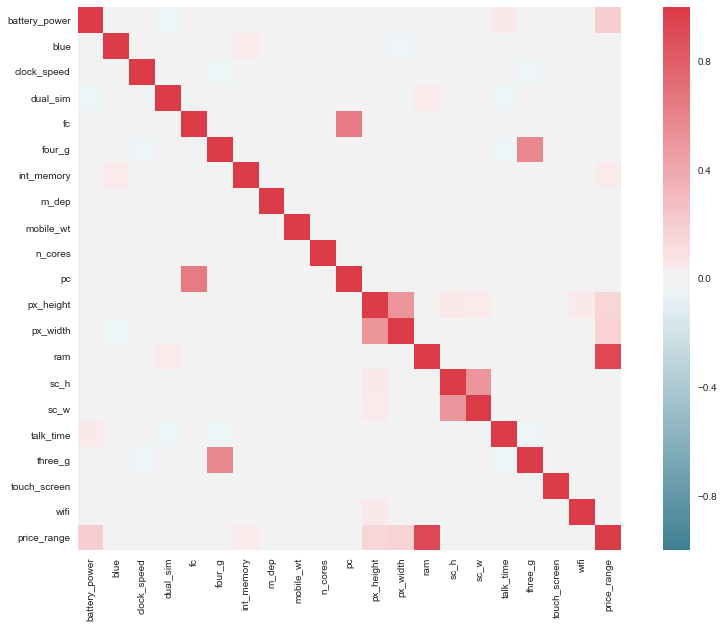

In [130]:
f, ax = plt.subplots(figsize=(15, 10))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

### Remove attributes with low correlation

In [200]:
train.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [240]:
X = train.drop('sc_h',axis = 1)
X = X.drop('sc_w',axis = 1)
X = X.drop('n_cores',axis = 1)
X = X.drop('m_dep',axis = 1)
X = X.drop('int_memory',axis = 1)
X = X.drop('clock_speed',axis = 1)

### Changes based on Correlation Plot

- Phone width and Phone width are highly correlated so lets create a new column (AVERAGE OF HEIGHT, WIDTH) 
- PC and FC are also highly correlated so we can combine them too

In [209]:
X['height_width'] = (X['px_height'] + X['px_width'])/ 2
X = X.drop('px_width',axis = 1)
X = X.drop('px_height',axis = 1)

In [210]:
X['pc_fc'] = (X['pc'] + X['fc'])/ 2
X = X.drop('pc',axis = 1)
X = X.drop('fc',axis = 1)

In [211]:
X.corr()['price_range']

battery_power    0.200723
blue             0.020573
dual_sim         0.017444
four_g           0.014772
mobile_wt       -0.030302
ram              0.917046
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
height_width     0.180901
pc_fc            0.031621
Name: price_range, dtype: float64

### Analysing Each and Every Column

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

PRICE RANGE VS BATTERY POWER


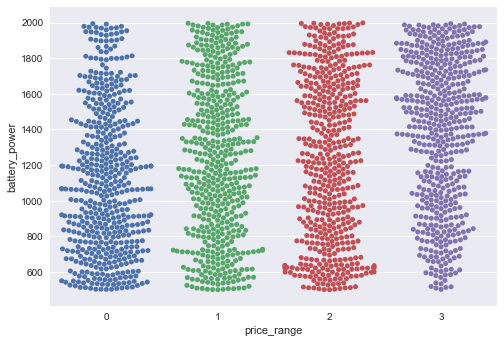

In [219]:
### BATTERY POWER ###


print(X.groupby('price_range')['battery_power'].mean())
print("\nPRICE RANGE VS BATTERY POWER")
sns.swarmplot(x="price_range", y="battery_power", size=5, data=X);
plt.show()

In [220]:
X.loc[X['battery_power']>1300, 'battery'] = 2
X.loc[X['battery_power']<=1300, 'battery'] = 1
X.loc[X['battery_power']<=1200, 'battery'] = 0

In [221]:
X = X.drop('battery_power',axis=1)
X['battery'].value_counts()

0.0    967
2.0    915
1.0    118
Name: battery, dtype: int64

In [226]:
X.corr()['price_range']

blue            0.020573
dual_sim        0.017444
four_g          0.014772
mobile_wt      -0.030302
ram             0.917046
talk_time       0.021859
three_g         0.023611
touch_screen   -0.030411
wifi            0.018785
price_range     1.000000
height_width    0.180901
pc_fc           0.031621
battery         0.199694
hw              0.151717
Name: price_range, dtype: float64

price_range
0     843.339
1     959.400
2     933.165
3    1057.343
Name: height_width, dtype: float64

PRICE RANGE VS BATTERY POWER


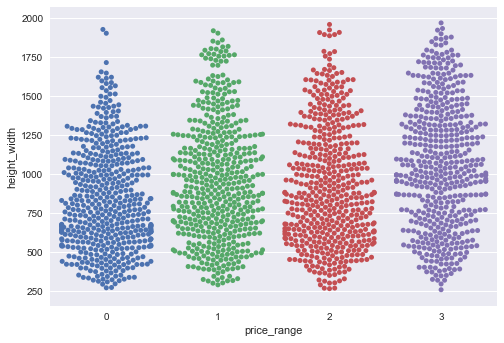

In [224]:
##### HEIGHT AND WIDTH ###

print(X.groupby('price_range')['height_width'].mean())
print("\nPRICE RANGE VS BATTERY POWER")
sns.swarmplot(x="price_range", y="height_width", size=5, data=X);
plt.show()

In [225]:
X.loc[X['height_width']>=1000, 'hw'] = 2
X.loc[X['height_width']<1000, 'hw'] = 1
X.loc[X['height_width']<=900, 'hw'] = 0

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

PRICE RANGE VS BATTERY POWER


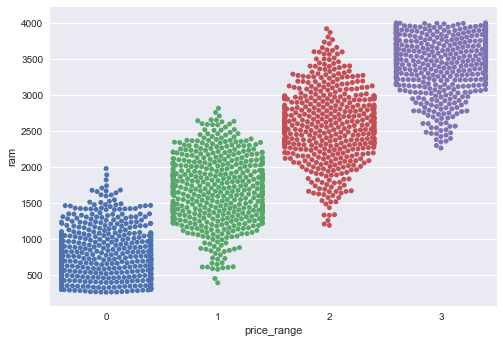

In [227]:
##### HEIGHT AND WIDTH ###

print(X.groupby('price_range')['ram'].mean())
print("\nPRICE RANGE VS BATTERY POWER")
sns.swarmplot(x="price_range", y="ram", size=5, data=X);
plt.show()

In [228]:
X.loc[X['ram']>=3000, 'RAM'] = 3
X.loc[X['ram']<3000, 'RAM'] = 2
X.loc[X['ram']<2000, 'RAM'] = 1
X.loc[X['ram']<1000, 'RAM'] = 0
X = X.drop('ram',axis=1)
X = X.drop('height_width',axis=1)

In [235]:
X.corr()['price_range']

blue            0.020573
dual_sim        0.017444
four_g          0.014772
talk_time       0.021859
three_g         0.023611
touch_screen   -0.030411
wifi            0.018785
price_range     1.000000
pc_fc           0.031621
battery         0.199694
hw              0.151717
RAM             0.896354
mobilewt       -0.027282
Name: price_range, dtype: float64

In [233]:
print(X.groupby('price_range')['mobile_wt'].mean())

price_range
0    140.552
1    140.510
2    143.614
3    136.320
Name: mobile_wt, dtype: float64


In [234]:
X.loc[X['mobile_wt']>=140, 'mobilewt'] = 1
X.loc[X['mobile_wt']<140, 'mobilewt'] = 0
X = X.drop('mobile_wt',axis=1)

In [237]:
X = X.drop('talk_time',axis=1)
X = X.drop('pc_fc',axis=1)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('price_range',axis=1), X['price_range'], test_size=0.33, random_state=42)
clf = LogisticRegression(random_state=0, multi_class='ovr')
model = clf.fit(X_train, y_train)
prediction=model.predict(X_test)
print('ACCURACY:',metrics.accuracy_score(prediction,y_test))
print("F1 SCORE:",metrics.f1_score(y_test, prediction, average='weighted'))

ACCURACY: 0.803030303030303
F1 SCORE: 0.7964928111289029


In [242]:
model=svm.SVC(kernel='linear')
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= linear is 0.9045454545454545
